In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Check the contents of the mounted Google Drive
drive_path = '/content/drive/MyDrive/'
os.listdir(drive_path)


In [ ]:
import  zipfile

zipfile_name = "/content/drive/MyDrive/Bone_fracture_dataset.zip"
try:
  with zipfile.ZipFile(zipfile_name) as zp:
    zp.extractall()
  print("Successfully extracted")
except:
  print('Error Appeared')
  print("Please CHeck the file")

Successfully extracted


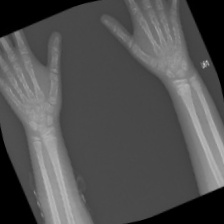

In [ ]:
img = cv.imread("/content/bone_dataset/train/fractured/10-rotated1-rotated1-rotated3.jpg")
cv2_imshow(img)

In [ ]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 , validation_split=0.2 )


In [ ]:
data_dir = "/content/bone_dataset/train"
train_gener = generator.flow_from_directory(directory=data_dir, target_size=(150 , 150) , class_mode = "categorical" , subset = "training")


Found 7091 images belonging to 2 classes.


In [ ]:
val_gener = generator.flow_from_directory(directory=data_dir, target_size=(150 , 150) , class_mode = "categorical" , subset = "validation")

Found 1772 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 64 , kernel_size=(3 , 3) , activation = 'relu' , input_shape = (150 , 150  , 3)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters = 64 , kernel_size=(3 , 3) , activation = 'relu' ))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 2 , activation = tf.nn.softmax))


In [ ]:
model.compile( loss =  tf.keras.losses.binary_focal_crossentropy , metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dropout (Dropout)           (None, 82944)             0

In [19]:
history = model.fit(x=train_gener, epochs=3, validation_data=val_gener, verbose=1)

Epoch 1/3
222/222 [==============================] - 602s 3s/step - loss: 0.1394 - accuracy: 0.7235 - val_loss: 0.2626 - val_accuracy: 0.5040
Epoch 2/3
222/222 [==============================] - 580s 3s/step - loss: 0.0748 - accuracy: 0.8858 - val_loss: 0.5837 - val_accuracy: 0.5169
Epoch 3/3
222/222 [==============================] - 582s 3s/step - loss: 0.0425 - accuracy: 0.9442 - val_loss: 0.6769 - val_accuracy: 0.5158


In [20]:
hist = history.history
print(hist)

{'loss': [0.1394391506910324, 0.07477467507123947, 0.04248792678117752], 'accuracy': [0.7234522700309753, 0.8857706785202026, 0.9441545605659485], 'val_loss': [0.26255539059638977, 0.583702802658081, 0.6769357323646545], 'val_accuracy': [0.5039503574371338, 0.5169300436973572, 0.5158013701438904]}


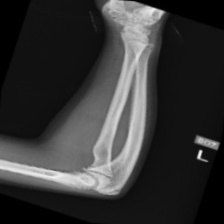

This is the shape of the image (150, 150, 3)
1/1 [==============================] - 0s 35ms/step


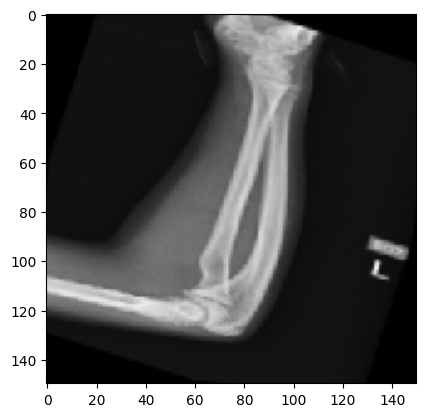

In [55]:
img_path = '/content/bone_dataset/train/not fractured/10-rotated1-rotated1-rotated1.jpg'
img = cv.imread(img_path)
cv2_imshow(img)
imgp = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
plt.imshow(imgp)
x = tf.keras.preprocessing.image.img_to_array(imgp)
print("This is the shape of the image" , x.shape)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)

In [56]:
print(preds)
map_of_classes = train_gener.class_indices

[[0. 1.]]


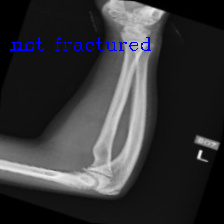

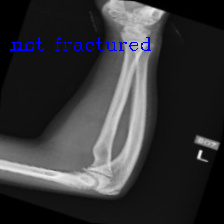

In [59]:
result = ""
for key , value in map_of_classes.items():
  if value == np.argmax(preds):
    result = key
    break
result

cv.putText(img=img , text = result ,color=255 , fontFace=cv.FONT_HERSHEY_COMPLEX, fontScale=0.6, org = (10 , 50) )
cv2_imshow(img)

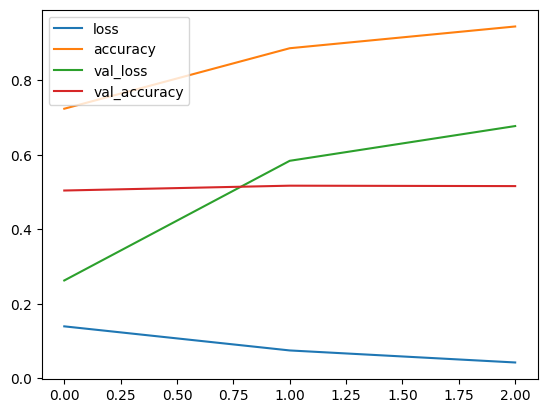

In [30]:
for key , value in hist.items():
  plt.plot(value , label = key )
plt.legend()
plt.show()

In [26]:
model.save("model.h5")